In [2]:
import bilby
import corner
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors

from bilby.core.result import Result

In [3]:
# ML estimates for GW170814
mle = dict()
mle["ra"] = 47.75*np.pi/180
mle["dec"] = -np.pi/4
mle["psi"] = 0.0
mle["phi0"] = 0.0
mle["m1"] = 15 #30.6
mle["m2"] = 1.5 #25.2
mle["theta_jn"] = np.pi/3. #np.pi/4
mle["coa_phase"] = np.pi/4
mle["distance"] = 100. #
mle["approx"] = "IMRPhenomXPHM"
mle["geocent_time"] = 1186741861.0

parameters = dict(ra=mle["ra"], dec=mle["dec"], inclination=mle["theta_jn"],\
                  distance=mle["distance"], geocent_time=mle["geocent_time"])

In [4]:
summary22 = Result.from_json("/home1/mukesh.singh/work/BayestarHM/likelihood_in_bilby/asymmetric_masses/extrinsic_parameters_non_uniform_priors_22/BayestarHM_extrinsic_params_22_with_non_trivial_priors_and_delay_time_nlive_1000_result.json")

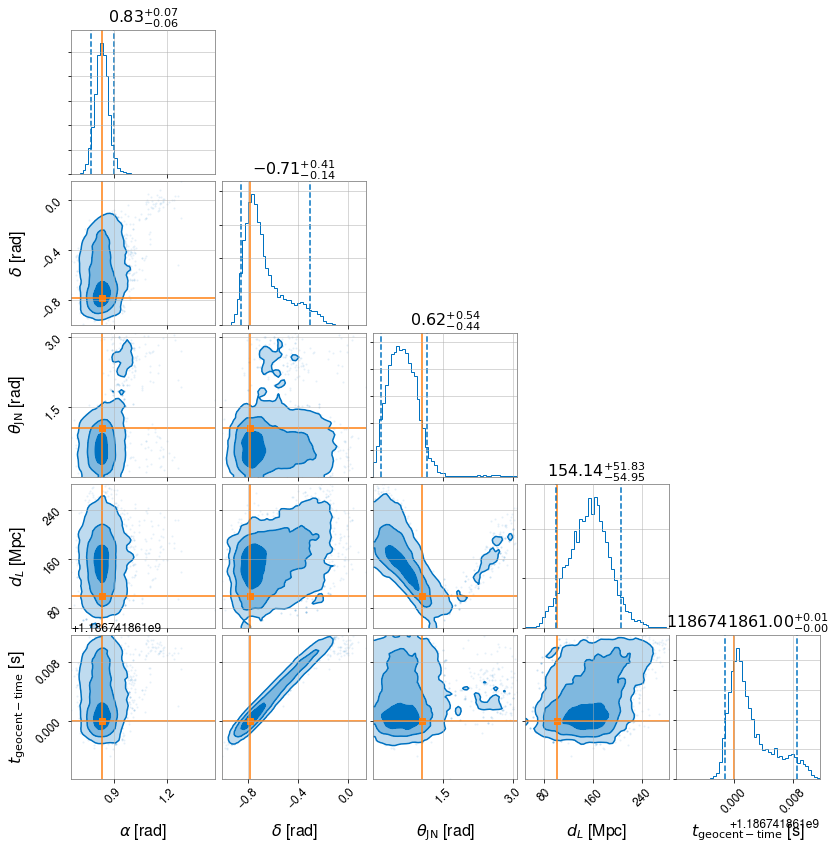

In [13]:
kwargs = dict(quantiles=[0.05, 0.95])
filename = "/home1/mukesh.singh/work/BayestarHM/likelihood_in_bilby/asymmetric_masses/extrinsic_parameters_non_uniform_priors_22/BayestarHM_five_extrinsic_params_with_non_trivial_priors_and_delay_time_nlive_1000_corner.png"
summary22.plot_corner(parameters=parameters, titles=True, filename=filename, save=True, **kwargs)

In [6]:
summary22.plot_marginals(parameters=parameters, quantiles=[0.05, 0.95])

14:20 bilby INFO    : Plotting ra marginal distribution
14:20 bilby INFO    : Plotting ra marginal distribution
14:20 bilby INFO    : Plotting dec marginal distribution
14:20 bilby INFO    : Plotting dec marginal distribution
14:20 bilby INFO    : Plotting inclination marginal distribution
14:20 bilby INFO    : Plotting inclination marginal distribution
14:20 bilby INFO    : Plotting distance marginal distribution
14:21 bilby INFO    : Plotting distance marginal distribution
14:21 bilby INFO    : Plotting geocent_time marginal distribution
14:21 bilby INFO    : Plotting geocent_time marginal distribution


In [7]:
summaryHM = Result.from_json("/home1/mukesh.singh/work/BayestarHM/likelihood_in_bilby/asymmetric_masses/extrinsic_parameters_non_uniform_priors_HM/BayestarHM_extrinsic_params_HM_with_non_trivial_priors_and_delay_time_nlive_1000_result.json")

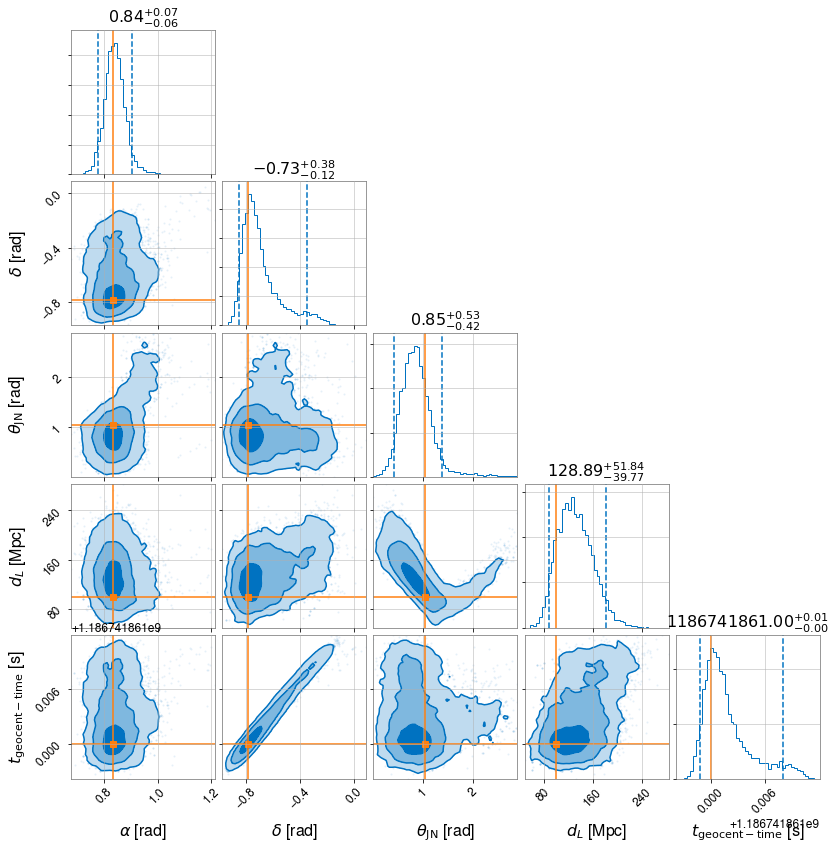

In [14]:
kwargs = dict(quantiles=[0.05, 0.95])
filename = "/home1/mukesh.singh/work/BayestarHM/likelihood_in_bilby/asymmetric_masses/extrinsic_parameters_non_uniform_priors_HM/BayestarHM_five_extrinsic_params_with_non_trivial_priors_time_delay_nlive_2000_corner_HM.png"
summaryHM.plot_corner(parameters=parameters, titles=True, filename=filename, save=True, **kwargs)

In [9]:
data22 = []
data22.append(summary22.posterior["ra"])
data22.append(summary22.posterior["dec"])
data22.append(summary22.posterior["inclination"])
data22.append(summary22.posterior["distance"])
data22.append(summary22.posterior["geocent_time"])

dataHM = []
dataHM.append(summaryHM.posterior["ra"])
dataHM.append(summaryHM.posterior["dec"])
dataHM.append(summaryHM.posterior["inclination"])
dataHM.append(summaryHM.posterior["distance"])
dataHM.append(summaryHM.posterior["geocent_time"])

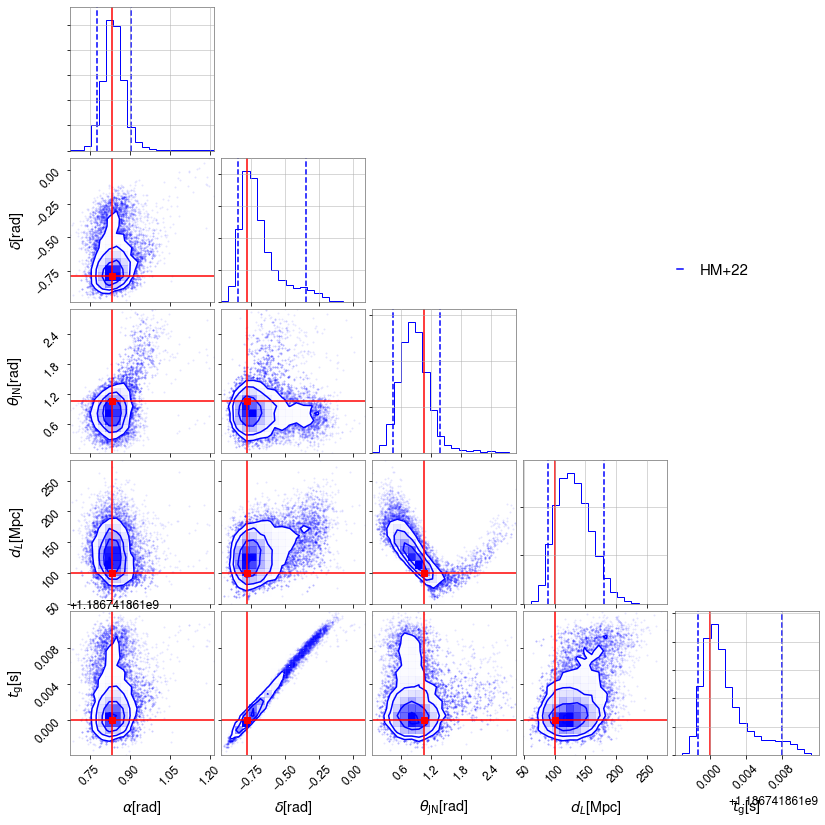

In [10]:
fig1 = corner.corner(np.array(dataHM).T, bins=20, labels=[r"$ \alpha$[rad]", r"$\delta$[rad]", r"$\theta_{\mathrm{JN}}$[rad]", r"$d_L$[Mpc]", r"$t_{\mathrm{g}}$[s]"],
                      show_titles=False, color='b', truths=[mle["ra"], mle["dec"], mle["theta_jn"], mle["distance"], mle["geocent_time"]],
                     truth_color='r', quantiles=[0.05, 0.95], hist_kwargs=dict(density=True))
fig1.legend(
        handles=[
            mlines.Line2D([], [], color='b', label="HM+22")
        ],
        fontsize=15, frameon=False,
        bbox_to_anchor=(0.9, 0.68), loc="upper right"
    )

In [11]:
fig2 = corner.corner(np.array(data22).T, bins=20, fig=fig1, labels=[r"$ \alpha$[rad]", r"$\delta$[rad]", r"$\theta_{\mathrm{JN}}$[rad]", r"$d_L$[Mpc]", r"$t_{\mathrm{g}}$[s]"],
                      show_titles=False, color='g', truths=[mle["ra"], mle["dec"], mle["theta_jn"], mle["distance"], mle["geocent_time"]],
                     truth_color='r', quantiles=[0.05, 0.95], hist_kwargs=dict(density=True))
fig2.legend(
        handles=[
            mlines.Line2D([], [], color='g', label="22")
        ],
        fontsize=15, frameon=False,
        bbox_to_anchor=(0.86, 0.73), loc="upper right"
    )

In [12]:
fig2.savefig("/home1/mukesh.singh/work/BayestarHM/likelihood_in_bilby/asymmetric_masses/BayestarHM_only_five_params_m1_15_m2_1.5_iota_60_dL_100_with_non_trivial_priors_and_delay_time_nlive_1000_corner_HM_22.png")